In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv("loan-test.csv")

In [5]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
dataset.shape

(367, 12)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
dataset.describe

<bound method NDFrame.describe of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0 

In [10]:
pd.crosstab(dataset["Credit_History"],dataset['Property_Area'])

Property_Area,Rural,Semiurban,Urban
Credit_History,,,
0.0,20,21,18
1.0,83,84,112


<Axes: >

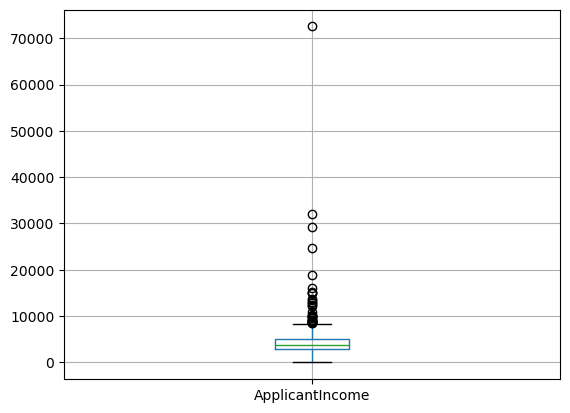

In [11]:
dataset.boxplot(column = 'ApplicantIncome')

<Axes: >

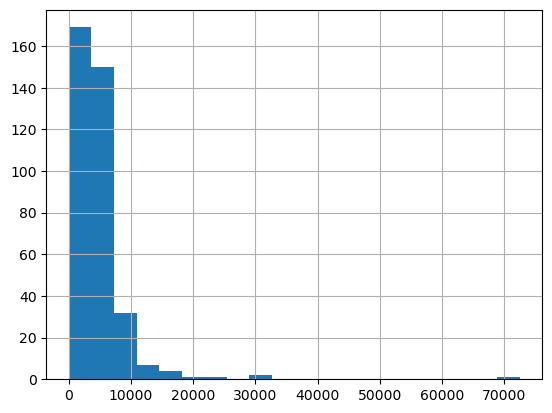

In [12]:
dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

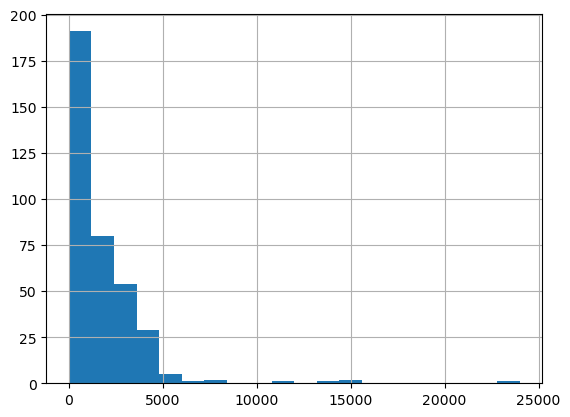

In [13]:
dataset['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

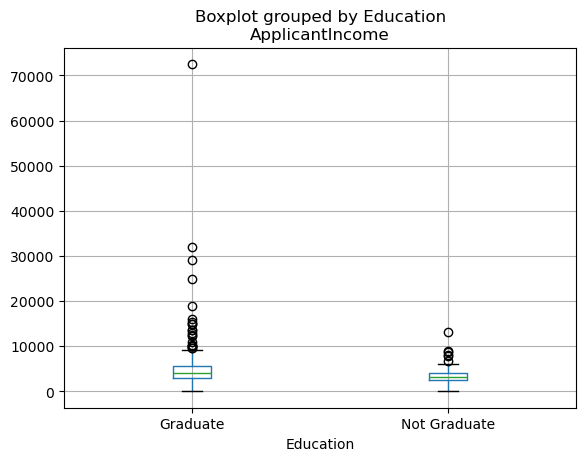

In [17]:
dataset.boxplot(column='ApplicantIncome', by= 'Education')

<Axes: >

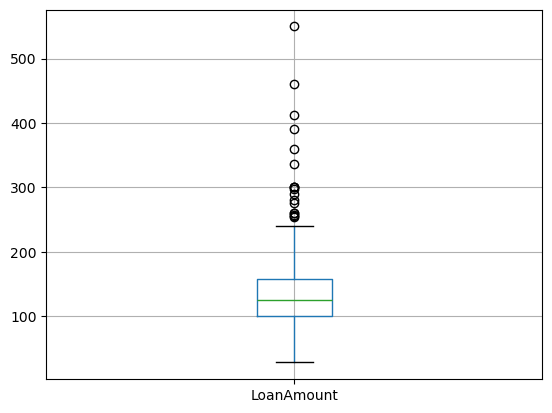

In [18]:
dataset.boxplot(column='LoanAmount')

<Axes: >

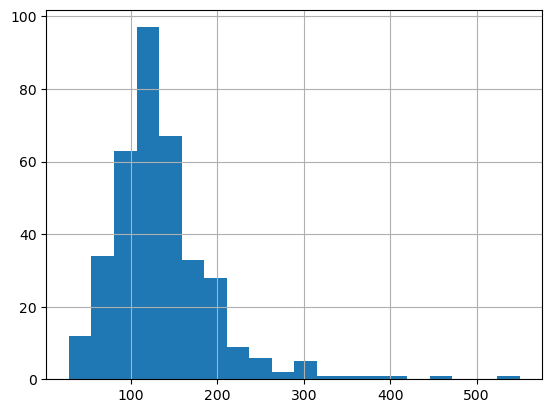

In [19]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

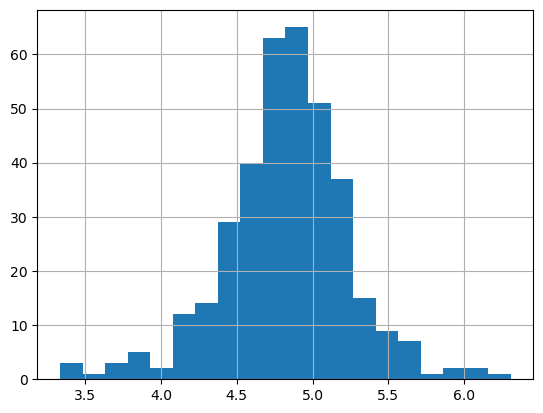

In [20]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [21]:
dataset.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
LoanAmount_log        5
dtype: int64

In [30]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [31]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [32]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

In [33]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [34]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [35]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [36]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [38]:
dataset['TotalIncome']=dataset['ApplicantIncome']+ dataset['CoapplicantIncome']
dataset['TotalIncome_log']= np.log(dataset['TotalIncome'])

<Axes: >

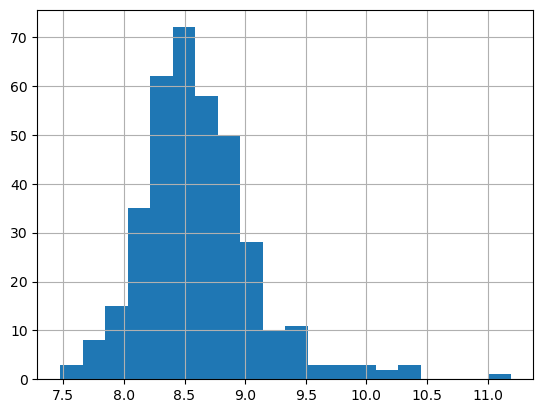

In [39]:
dataset['TotalIncome_log'].hist(bins=20)

In [40]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [98]:
X= dataset.iloc[:,np.r_[1:5:,9:11,13:15]].values
Y= dataset.iloc[:,11].values

In [99]:
X

array([['Male', 'Yes', '0', ..., 1.0, 5720, 8.651724084373843],
       ['Male', 'Yes', '1', ..., 1.0, 4576, 8.428580533059634],
       ['Male', 'Yes', '2', ..., 1.0, 6800, 8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 1.0, 5243, 8.564649132572534],
       ['Male', 'Yes', '0', ..., 1.0, 7393, 8.9082888855571],
       ['Male', 'No', '0', ..., 1.0, 9200, 9.126958763037132]],
      dtype=object)

In [100]:
Y

array(['Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Rural', 'Urban', 'Semiurban', 'Urban', 'Semiurban', 'Urban',
       'Semiurban', 'Semiurban', 'Urban', 'Urban', 'Semiurban', 'Urban',
       'Semiurban', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Rural',
       'Urban', 'Urban', 'Semiurban', 'Urban', 'Semiurban', 'Urban',
       'Semiurban', 'Urban', 'Urban', 'Semiurban', 'Urban', 'Urban',
       'Urban', 'Urban', 'Urban', 'Urban', 'Semiurban', 'Semiurban',
       'Urban', 'Urban', 'Urban', 'Semiurban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', 'Semiurban', 'Urban', 'Urban', 'Urban',
       'Rural', 'Semiurban', 'Semiurban', 'Semiurban', 'Semiurban',
       'Urban', 'Semiurban', 'Rural', 'Urban', 'Semiurban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Rural', 'Semiurban', 'Semiurban',
       'Urban', 'Rural', 'Semiurban', 'Urban', 'Urban', 'Rural',
       'Semiurban', 'Urban', 'Urban', 'Urban', 'Rural', 'Rural',
       'Semiurban', 'Rural

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, = train_test_split(X, Y, test_size=0.2, random_state=0)

In [103]:
print (X_train)

[['Female' 'No' '0' ... 0.0 3601 8.188966863648876]
 ['Male' 'Yes' '0' ... 0.0 5404 8.59489469908009]
 ['Male' 'Yes' '2' ... 1.0 7500 8.922658299524402]
 ...
 ['Male' 'Yes' '1' ... 0.0 4416 8.392989587956931]
 ['Male' 'No' '0' ... 1.0 4258 8.356554845453426]
 ['Male' 'Yes' '0' ... 1.0 5225 8.561210076833012]]


In [104]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [106]:
for i in range(0, 5):
    X_train[:,i]= labelencoder_X.fit_transform(X_train[:,i])

In [107]:
X_train[:,7]= labelencoder_X.fit_transform(X_train[:,7])

In [108]:
X_train

array([[0, 0, 0, ..., 0.0, 3601, 41],
       [1, 1, 0, ..., 0.0, 5404, 148],
       [1, 1, 2, ..., 1.0, 7500, 219],
       ...,
       [1, 1, 1, ..., 0.0, 4416, 88],
       [1, 0, 0, ..., 1.0, 4258, 79],
       [1, 1, 0, ..., 1.0, 5225, 139]], dtype=object)

In [110]:
labelencoder_Y=LabelEncoder()
Y_train= labelencoder_Y.fit_transform(Y_train)

In [111]:
Y_train

array([0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2,
       0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0,
       1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0,
       2, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 1, 1, 0, 0, 1, 0])

In [112]:
for i in range(0, 5):
    X_test[:,i]= labelencoder_X.fit_transform(X_test[:,i])

In [113]:
X_test[:,7]= labelencoder_X.fit_transform(X_test[:,7])

In [114]:
labelencoder_Y=LabelEncoder()
Y_test= labelencoder_Y.fit_transform(Y_test)

In [115]:
X_test

array([[1, 0, 0, 0, 2, 0.0, 3356, 10],
       [0, 0, 1, 0, 2, 1.0, 6433, 57],
       [1, 1, 0, 0, 2, 1.0, 8160, 68],
       [1, 1, 2, 0, 2, 1.0, 5613, 47],
       [1, 1, 1, 0, 2, 1.0, 7466, 62],
       [1, 0, 0, 1, 2, 1.0, 2868, 6],
       [1, 1, 0, 0, 2, 1.0, 5474, 43],
       [0, 0, 3, 0, 2, 0.0, 7638, 65],
       [1, 0, 0, 0, 3, 1.0, 4333, 25],
       [0, 0, 1, 1, 2, 1.0, 2226, 0],
       [1, 0, 0, 0, 2, 1.0, 3125, 7],
       [1, 1, 3, 0, 1, 1.0, 6088, 54],
       [1, 1, 1, 0, 2, 1.0, 18840, 73],
       [1, 1, 0, 1, 2, 1.0, 4887, 34],
       [1, 1, 2, 0, 2, 1.0, 4120, 20],
       [0, 0, 0, 0, 2, 1.0, 2362, 2],
       [1, 1, 1, 1, 2, 1.0, 4357, 26],
       [0, 1, 0, 0, 3, 0.0, 2262, 1],
       [1, 1, 0, 1, 2, 1.0, 5668, 49],
       [1, 0, 0, 0, 2, 0.0, 4727, 32],
       [1, 1, 3, 1, 2, 0.0, 7322, 61],
       [1, 1, 0, 0, 2, 1.0, 3342, 9],
       [1, 1, 3, 0, 0, 1.0, 4720, 31],
       [0, 1, 0, 0, 2, 0.0, 4241, 22],
       [0, 0, 0, 0, 2, 1.0, 14987, 72],
       [0, 1, 1, 0, 2, 1.0, 5

In [116]:
Y_test

array([2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 1,
       2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 1])

In [118]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [121]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [122]:
Y_pred= DTClassifier.predict(X_test)
Y_pred

array([2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 0, 2,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 0, 0, 0, 0, 1, 2, 2])

In [125]:
from sklearn import metrics
print('The accuracy of decision tree is: ', metrics.accuracy_score(Y_pred,Y_test))

The accuracy of decision tree is:  0.28378378378378377


In [127]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,Y_train)

GaussianNB()

In [128]:
Y_pred+NBClassifier.predict(X_test)

array([3, 2, 4, 3, 2, 2, 2, 2, 1, 2, 4, 3, 3, 2, 3, 3, 2, 3, 0, 1, 0, 4,
       2, 2, 3, 1, 2, 1, 4, 1, 1, 3, 1, 0, 1, 0, 2, 1, 3, 4, 2, 3, 3, 3,
       1, 1, 1, 0, 1, 0, 3, 2, 0, 1, 0, 3, 0, 2, 1, 2, 3, 2, 1, 2, 4, 1,
       3, 2, 0, 2, 2, 2, 4, 3])

In [129]:
Y_pred

array([2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 0, 2,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 0, 0, 0, 0, 1, 2, 2])

In [131]:
print('the accuracy of Naive Bayes is:', metrics.accuracy_score(Y_pred,Y_test))

the accuracy of Naive Bayes is: 0.28378378378378377


In [132]:
testdata= pd.read_csv("loan-test.csv")

In [133]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [134]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [135]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [138]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)                          

In [139]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

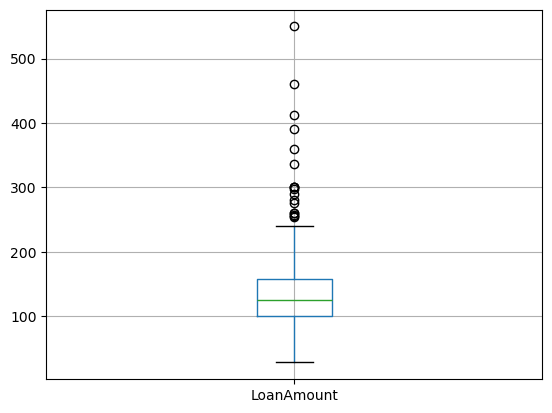

In [140]:
testdata.boxplot(column='LoanAmount')

<Axes: >

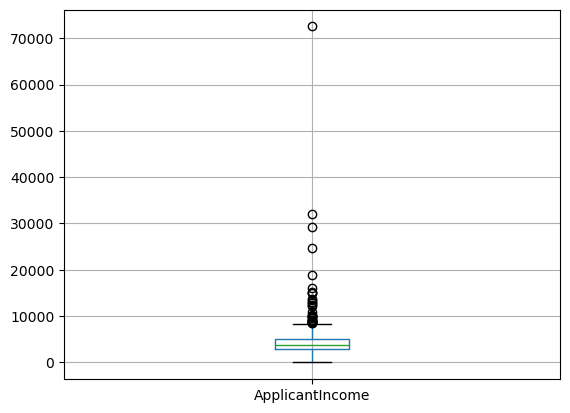

In [141]:
testdata.boxplot(column='ApplicantIncome')

In [143]:
testdata.LoanAmount=testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [144]:
testdata['LoanAmount_log']=np.log(testdata['LoanAmount'])

In [145]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [146]:
testdata['TotalIncome']= testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log']= np.log(testdata['TotalIncome'])


In [147]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [148]:
test= testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [154]:
for i in range(0,5):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [155]:
test[:,7]=labelencoder_X.fit_transform(test[:,7])

In [156]:
test

array([[1, 10, 0, ..., 1.0, 5720, 207],
       [1, 10, 1, ..., 1.0, 4576, 124],
       [1, 10, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 10, 0, ..., 1.0, 5243, 174],
       [1, 10, 0, ..., 1.0, 7393, 268],
       [1, 6, 0, ..., 1.0, 9200, 311]], dtype=object)

In [157]:
test= ss.fit_transform(test)